In [50]:
import pandas as pd
#Step 1:load dataset
df = pd.read_csv('/sales_data_sample.csv',encoding='latin-1')

# Convert 'ORDERDATE' to datetime objects, coercing errors
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Display the first 5 rows
display(df.head())

# Print the column names and their data types
display(df.info())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

None

In [40]:
#Step 2: Data Cleaning and Exploration
#Check for null values, data types, and duplicates:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


np.int64(0)

In [41]:
#Step 3: Generate Descriptive Statistics
#Use describe() and manual calculations:
df.describe()
df['SALES'].mean(), df['SALES'].median(), df['SALES'].mode(), df['SALES'].std()

(np.float64(3553.889071909316),
 3184.8,
 0    3003.0
 Name: SALES, dtype: float64,
 1841.8651057401805)

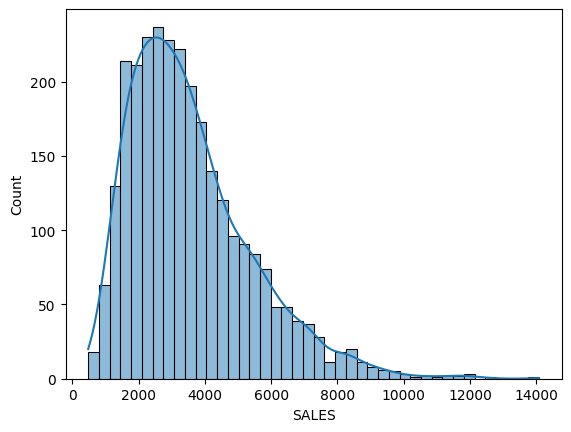

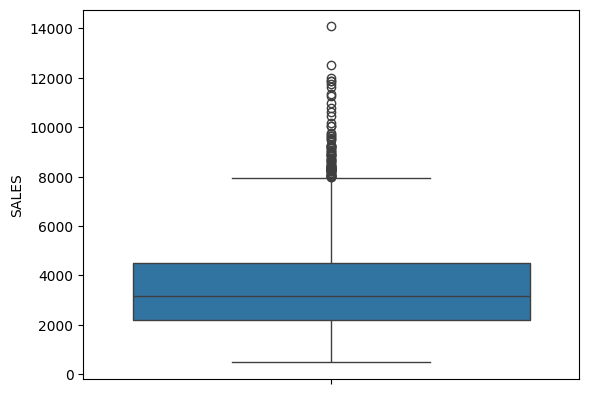

In [42]:
#Step 4: Visualize Data Distributions
#Use histograms, boxplots for numerical columns:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['SALES'], kde=True)
plt.show()

sns.boxplot(y=df['SALES'])
plt.show()

In [43]:
#Step 5: Formulate Hypotheses
#Create at least two null and alternative hypotheses:

#Example:

#H₀: The average monthly sales is $5000.

#H₁: The average monthly sales is not $5000.

In [44]:
#Step 6: Perform Hypothesis Testing
#1. One-sample t-test

from scipy.stats import ttest_1samp

stat, p = ttest_1samp(df['SALES'], 5000)
print(f'p-value: {p}')

p-value: 1.0641890599216705e-296


In [45]:
#2. Two-sample t-test (e.g., comparing sales of two regions)

from scipy.stats import ttest_ind

group1 = df[df['COUNTRY']=='USA']['SALES']
group2 = df[df['COUNTRY']=='France']['SALES']
stat, p = ttest_ind(group1, group2)
print(f'p-value: {p}')

p-value: 0.5376112455347222


In [46]:
#3. Chi-square test (for categorical variables)
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['DEALSIZE'], df['STATUS'])
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 0.00016145746484116236


In [47]:
#4. ANOVA (comparison of 3+ groups)
from scipy.stats import f_oneway

# Get unique countries to use as groups
countries = df['COUNTRY'].unique()

# Create a list of sales data for each country
country_sales = [df[df['COUNTRY'] == country]['SALES'] for country in countries]

# Perform ANOVA test
stat, p = f_oneway(*country_sales)
print(f'p-value: {p}')

p-value: 0.7729502139369222


In [48]:
#Step 7: Interpret p-values

if p < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


<Axes: >

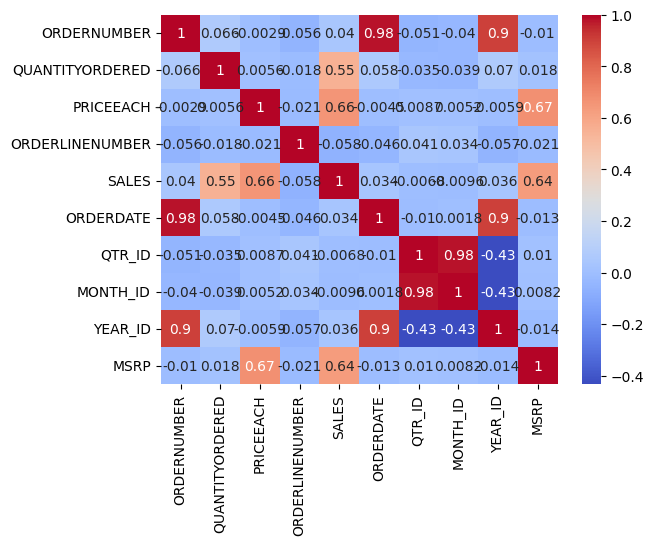

In [52]:
`#Step 8: Correlation Analysis (Bonus)

# Select only numerical columns for correlation analysis
df_numeric = df.select_dtypes(include=['number', 'datetime'])

sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

In [54]:
#Step 9: Pivot Tables / Group Summaries (Bonus)
df.pivot_table(values='SALES', index='COUNTRY', columns='PRODUCTLINE', aggfunc='mean')

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,3643.123396,3460.336923,2994.154800,2079.880000,1681.350000,3865.925000,3268.195172
Austria,4058.378800,5209.532000,2976.740000,2256.182500,NaN,4094.550000,2719.748000
Belgium,5034.240000,NaN,5624.790000,2882.546364,3005.753333,NaN,2994.685714
Canada,4401.658571,4177.490000,2551.007000,2879.215000,NaN,3246.623750,2700.852667
Denmark,4623.014118,NaN,3793.225000,2764.090000,2869.082500,4794.410000,3015.115714
Finland,4040.848421,3682.055385,2864.594167,3312.048889,2558.525000,3679.939091,2626.142857
France,3968.889796,3329.269265,3379.859688,3166.031905,3905.828571,3899.407333,3044.996724
Germany,4119.861111,2499.166667,2875.157500,2750.500000,2521.710000,5089.000000,2326.212222
Ireland,5281.470000,2476.600000,2946.090000,NaN,1556.300000,3983.050000,2234.400000
